In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import neighbors

In [2]:
df = pd.read_csv('train.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
le = preprocessing.LabelEncoder()
le.fit(df['Sex'])
print(le.classes_)


['female' 'male']


In [4]:
df["Sex"]= le.transform(df["Sex"])

In [5]:
le1 = preprocessing.LabelEncoder()
le1.fit(df['Embarked'])
print(le1.classes_)

['C' 'Q' 'S']


In [6]:
df["Embarked"]= le1.transform(df["Embarked"])

In [7]:
y = df['Pclass']
X = df.drop(['PassengerId','Name','Ticket','Cabin','Fare','Age'], axis=1)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state =0)

In [9]:
def knn_all(a):
    knn = neighbors.KNeighborsClassifier(n_neighbors = a)
    acc_sc = knn.fit(X_train,y_train).score(X_test,y_test)
    y_pred = knn.predict(X_test)
    con_mtx = confusion_matrix(y_test,y_pred)
    #print('Model Accuracy Score :')
    #print(acc_sc,'\n')
    #print('Confusion Matrix :')
    #print(con_mtx)
    #print('\n****************************************************************************************\n')
    return acc_sc

n = 0
models_acc_sc =[]
for i in range(1,268):
    n=n+1
    #print('MODEL',n,'\n' )
    accc = knn_all(i)
    models_acc_sc.append(accc)
# n = 0
print('All Models Accuracy Score Summery:\n')
print(models_acc_sc)
# for i in range(0,len(models_acc_sc)):
#     n=n+1
#     print('MODEL',n,':',models_acc_sc[i],'\n' )  

All Models Accuracy Score Summery:

[0.9887640449438202, 0.9925093632958801, 0.9887640449438202, 0.9962546816479401, 0.9887640449438202, 0.9850187265917603, 0.9812734082397003, 0.9887640449438202, 0.9625468164794008, 0.9737827715355806, 0.9737827715355806, 0.9887640449438202, 0.9887640449438202, 0.9887640449438202, 0.9775280898876404, 0.9887640449438202, 0.9812734082397003, 0.9887640449438202, 0.9662921348314607, 0.9775280898876404, 0.9737827715355806, 0.9737827715355806, 0.9662921348314607, 0.9737827715355806, 0.9662921348314607, 0.9700374531835206, 0.9400749063670412, 0.9588014981273408, 0.9588014981273408, 0.9588014981273408, 0.9588014981273408, 0.9588014981273408, 0.9588014981273408, 0.9588014981273408, 0.9588014981273408, 0.9662921348314607, 0.9588014981273408, 0.9662921348314607, 0.9662921348314607, 0.9662921348314607, 0.9662921348314607, 0.9662921348314607, 0.9700374531835206, 0.9700374531835206, 0.9700374531835206, 0.9700374531835206, 0.9700374531835206, 0.9700374531835206, 0.9

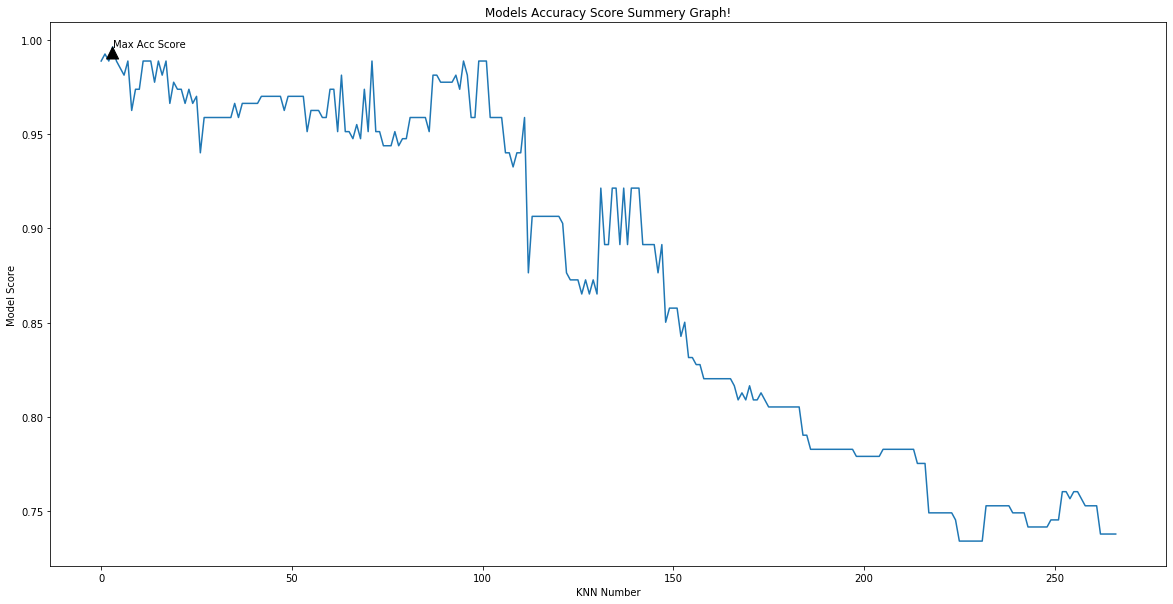

In [11]:
x1 = range(0,len(models_acc_sc))
y1 = models_acc_sc

plt.plot(x1,y1)

plt.xlabel('KNN Number')
plt.ylabel('Model Score')

plt.title('Models Accuracy Score Summery Graph!')
plt.rcParams["figure.figsize"] = (20,10)
aaa = y1.index(max(y1))
bbb = max(y1)

plt.annotate('Max Acc Score',xy = (aaa,bbb),arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()